## Análisis Exploratorio de los Ingresos recaudados de la Municipalidad Distrital de Pucusana - Año 2022
La información corresponde a todos los ingresos recaudados por la Municipalidad Distrital de Pucusana en el año 2022 (Enero - Setiembre). Los tipos de ingresos corresponden a impuesto predial, arbitrios (limpieza pública, parques y jardines o serenazgo) y otros conceptos como: formularios, carnets, constancias, multas, etc.

## 1. Carga de Datos de Diferentes Origenes

In [1]:
import pandas as pd

url='https://drive.google.com/file/d/1P7gB1y4SbMEeeQwOA-eX_AYiI-4tc9oR/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url, encoding = 'utf-8', sep=';')

df.shape

(101859, 38)

In [2]:
df.columns

Index(['FECHA_CORTE', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'ANIO', 'NUMMOVIMIENTO', 'TIPOMOV', 'CODPERSONA', 'docidentidad',
       'DATOSPERSONA', 'OBSERVACIONES', ' IMPORTE_C ', ' DERECHO_C ',
       ' INTERESES_C ', ' REAJUSTE_C ', ' DESCUENTO_C ', ' TOTALCOBRADO ',
       ' RECIBIDO ', ' VUELTO ', 'FECHACANC', 'FECHACANC.1', 'TIPOPAGO',
       'NUMORDEN', 'ANIORECIBO', 'NUMRECIBO', 'CODCUENTA', 'CODTRIBUTO',
       'NUMCUOTA', 'CODPREDIO', 'UBICACIONPREDIAL', 'CONCEPTO', ' IMPORTE_D ',
       ' DERECHO_D ', ' INTERESES_D ', ' REAJUSTE_D ', ' DESCUENTO_D ',
       ' SUBTOTAL_D '],
      dtype='object')

In [3]:
# Eliminando los caracteres en blanco del nombre de las columnas
df.rename(columns = {' IMPORTE_C ':'IMPORTE_C', 
                     ' DERECHO_C ':'DERECHO_C',
                     ' INTERESES_C ':'INTERESES_C',
                     ' REAJUSTE_C ':'REAJUSTE_C',
                     ' DESCUENTO_C ':'DESCUENTO_C',
                     ' TOTALCOBRADO ':'TOTALCOBRADO',
                     ' RECIBIDO ':'RECIBIDO',
                     ' VUELTO ':'VUELTO',
                     ' DERECHO_D ':'DERECHO_D',
                     ' INTERESES_D ':'INTERESES_D',
                     ' REAJUSTE_D ':'REAJUSTE_D',
                     ' IMPORTE_D ':'IMPORTE_D',
                     ' DESCUENTO_D ':'DESCUENTO_D',
                     ' SUBTOTAL_D ':'SUBTOTAL_D'}, inplace=True)

In [4]:
# String to Float format
def StringToFloatFormat(x):
  partialNum = x.split(',')
  allNum = ''
  
  for num in partialNum:
    allNum = allNum + num

  return allNum

#print(StringToFloatFormat('19,571.37'))
df['TOTALCOBRADO'] = df['TOTALCOBRADO'].apply(StringToFloatFormat)

In [5]:
df['FECHA_CORTE'] = df['FECHA_CORTE'].astype(str)
df['UBIGEO'] = df['UBIGEO'].astype(str)
df['TOTALCOBRADO'] = df['TOTALCOBRADO'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101859 entries, 0 to 101858
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FECHA_CORTE       101859 non-null  object 
 1   UBIGEO            101859 non-null  object 
 2   DEPARTAMENTO      101859 non-null  object 
 3   PROVINCIA         101859 non-null  object 
 4   DISTRITO          101859 non-null  object 
 5   ANIO              101859 non-null  int64  
 6   NUMMOVIMIENTO     101859 non-null  int64  
 7   TIPOMOV           101859 non-null  object 
 8   CODPERSONA        101859 non-null  int64  
 9   docidentidad      101859 non-null  object 
 10  DATOSPERSONA      101859 non-null  object 
 11  OBSERVACIONES     98061 non-null   object 
 12  IMPORTE_C         101859 non-null  object 
 13  DERECHO_C         101859 non-null  object 
 14  INTERESES_C       101859 non-null  object 
 15  REAJUSTE_C        101859 non-null  object 
 16  DESCUENTO_C       10

In [6]:
#dataContepto = df.groupby(['CONCEPTO'])['CONCEPTO'].count()

#dfAlcabala = df.query("((CONCEPTO == 'ALCABALA'))")
#dfAlcabala['TOTALCOBRADO']
#dfAlcabala['TOTALCOBRADO'].sum()

In [36]:
dataContepto = df.groupby(['CONCEPTO']).agg({'CONCEPTO':'count',
                                             'TOTALCOBRADO':['sum', 'max']})
dataContepto = dataContepto.reset_index()
dataContepto.head()

CONCEPTO       TOTALCOBRADO           
                                    count          sum        max
0                          ALCABALA     8    362380.38  155461.52
1                 BAÑOS MUNICIPALES   398     48323.85    1351.00
2                           CARNETS    14       263.20      18.80
3  CARNETS Y/O TARJETAS DE ATENCION   231      4334.00      18.80
4        CERTIFICADOS DOMICILIARIOS     1         8.80       8.80

In [37]:
dataContepto.shape

(53, 4)

In [38]:
dataContepto.columns

MultiIndex([(    'CONCEPTO',      ''),
            (    'CONCEPTO', 'count'),
            ('TOTALCOBRADO',   'sum'),
            ('TOTALCOBRADO',   'max')],
           )

In [75]:
from tables import index
headers = ['Concepto', 'Count', 'Sum', 'Max']
dataContepto.columns = headers

dataConteptoSortBySum = dataContepto.sort_values(by=['Sum'], ascending=False).reset_index().drop(['index'], axis=1)
dataConteptoSortBySum.head()

,Concepto,Count,Sum,Max
0,LIMPIEZA PÚBLICA,27463,1.149202e+08,437071.76
1,SERENAZGO,26450,1.118026e+08,437071.76
2,PARQUES Y JARDINES,21956,9.702921e+07,437071.76
3,IMPUESTO PREDIAL,20222,3.206345e+07,437071.76
4,MULTA TRIBUTARIA,94,6.998169e+05,139731.69


In [81]:
rango = dataConteptoSortBySum.index<5
rango

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [82]:
dataConteptoSortBySum[rango]

,Concepto,Count,Sum,Max
0,LIMPIEZA PÚBLICA,27463,1.149202e+08,437071.76
1,SERENAZGO,26450,1.118026e+08,437071.76
2,PARQUES Y JARDINES,21956,9.702921e+07,437071.76
3,IMPUESTO PREDIAL,20222,3.206345e+07,437071.76
4,MULTA TRIBUTARIA,94,6.998169e+05,139731.69


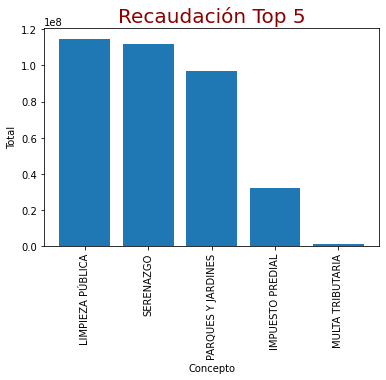

In [84]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 5', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [85]:
rango = (dataConteptoSortBySum.index>=5)&(dataConteptoSortBySum.index<10)
rango

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

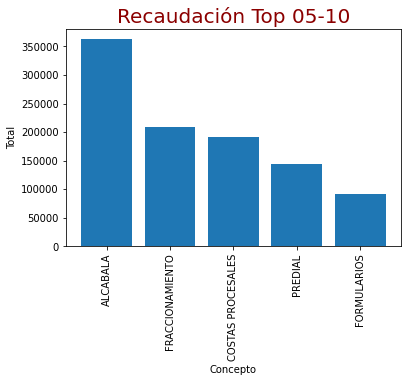

In [87]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 05-10', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [88]:
rango = (dataConteptoSortBySum.index>=10)&(dataConteptoSortBySum.index<15)
rango

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

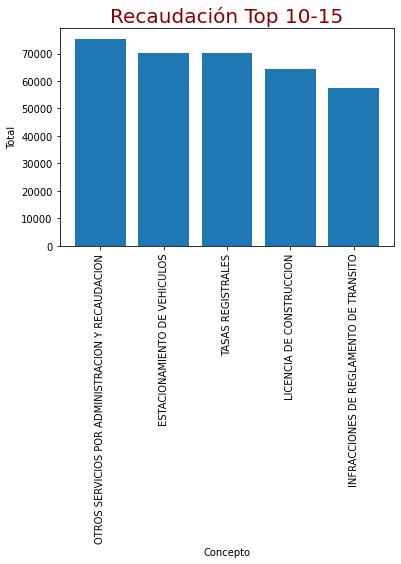

In [89]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 10-15', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

In [90]:
rango = (dataConteptoSortBySum.index>=10)&(dataConteptoSortBySum.index<20)
rango

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

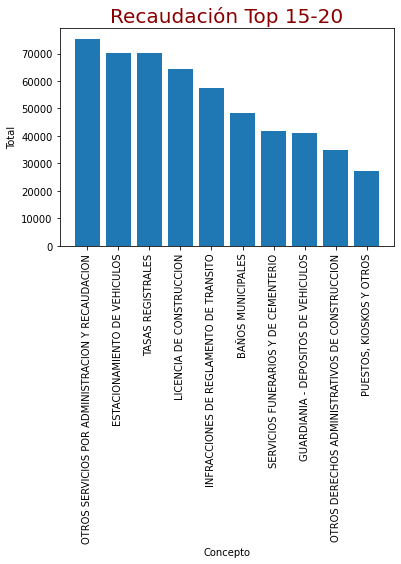

In [91]:
import matplotlib.pyplot as plt

x = dataConteptoSortBySum[rango].Concepto.tolist()
y = dataConteptoSortBySum[rango].Sum.tolist()

# customized dict for our title
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Recaudación Top 15-20', fontdict=font)
plt.xlabel('Concepto')
plt.ylabel('Total')

# Rotating X-axis labels
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()